In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import glob as glob
import os
import arviz as az

In [106]:
seed=np.arange(0,500,2)
frame_skip=4
dt_ckf=0.025
dt_control=0.1
N_steps=1000
move_radars = ["no-move_radars","move_radars"]
remove_tmp_images = ["remove_tmp_images"]
save_images = ["no-save_images"]

In [107]:
experiment_number = 12
folder_save =  os.path.join("results",f"experiment{experiment_number}_all")
os.makedirs(folder_save,exist_ok=True)

In [108]:
if experiment_number == 3:
    N_radar = 4
    title = f"4 Radar - 4 Target"
elif experiment_number == 2 or experiment_number==7 or experiment_number==10 or experiment_number==12:
    N_radar=6
    title = f"6 Radar - 3 Target" 
elif experiment_number == 1 or experiment_number==8 or  experiment_number==9 or experiment_number==11:
    N_radar=3
    title = f"3 Radar - 4 Target"

In [109]:
def get_rmse_array(filepath):
    results_mv_radar = sorted(list(glob.iglob(filepath+"*/*rmse*")))

    # print(results_mv_radar)

    rmse_array = []
    for rmse_file in results_mv_radar:
        rmse_array_i = np.genfromtxt(rmse_file,delimiter=",",skip_header=1)
        rmse_array.append(rmse_array_i[:600])

    rmse_array = np.stack(rmse_array)

    k = rmse_array[:,:600,0].mean(axis=0)
    rmse = rmse_array[:,:600,1]


    rmse = np.sqrt((rmse**2) / (N_radar*6))

    
    return k,rmse

In [110]:
def get_hz_array(filepath):
    results_mv_radar = sorted(list(glob.iglob(filepath+"*/*hz*")))

    # print(results_mv_radar)

    hz_array = []
    for rmse_file in results_mv_radar:
        hz_i = np.genfromtxt(rmse_file,delimiter=",",skip_header=1)
        hz_i = hz_i[hz_i!=0]
        hz_array.append(hz_i[:600])

    hz = np.stack(hz_array)
    
    return hz

In [111]:
experiment_name = os.path.join(f"Experiment{experiment_number}_SFIM",f"N_radar={N_radar}-{move_radars[1]}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_move_sfim = get_rmse_array(filepath)
print(len(rmse_move_sfim))

250


In [112]:
# plt.figure(figsize=(5,5))
# # rmse_move_sfim_old = rmse_move_sfim.copy()
# # az.plot_hdi(k, np.expand_dims(rmse_move_sfim_old,axis=0),hdi_prob=0.8,smooth=False,color='red',fill_kwargs={'alpha': 0.2})
# # plt.plot(np.quantile(rmse_move_sfim_old,q=0.5,axis=0), linewidth=2,color="red",label='SFIM Mobile Radar') #mean curve.
# az.plot_hdi(k, np.expand_dims(rmse_move_sfim,axis=0),hdi_prob=0.8,smooth=False,color='blue',fill_kwargs={'alpha': 0.2})
# plt.plot(np.quantile(rmse_move_sfim,q=0.5,axis=0), linewidth=2,color="blue",label='SFIM Mobile Radar') #mean curve.

In [113]:
experiment_name = os.path.join(f"Experiment{experiment_number}_PFIM_bad",f"N_radar={N_radar}-{move_radars[1]}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_move_pfim_bad = get_rmse_array(filepath)
print(len(rmse_move_pfim_bad))

250


In [114]:
# plt.figure(figsize=(5,5))
# az.plot_hdi(k, np.expand_dims(rmse_move_pfim_bad,axis=0),hdi_prob=0.8,smooth=False,color='blue',fill_kwargs={'alpha': 0.2})
# plt.plot(np.quantile(rmse_move_sfim,q=0.5,axis=0), linewidth=2,color="blue",label='SFIM Mobile Radar') #mean curve.

In [115]:
experiment_name = os.path.join(f"Experiment{experiment_number}_SFIM_bad",f"N_radar={N_radar}-{move_radars[1]}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_move_sfim_bad = get_rmse_array(filepath)
print(len(rmse_move_sfim_bad))

250


In [116]:
# plt.figure(figsize=(5,5))
# az.plot_hdi(k, np.expand_dims(rmse_move_sfim_bad,axis=0),hdi_prob=0.8,smooth=False,color='red',fill_kwargs={'alpha': 0.2})
# plt.plot(np.quantile(rmse_move_sfim_bad,q=0.5,axis=0), linewidth=2,color="red",label='SFIM Bad Mobile Radar') #mean curve.

In [117]:
experiment_name = os.path.join(f"Experiment{experiment_number}_PFIM",f"N_radar={N_radar}-{move_radars[1]}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_move_pfim = get_rmse_array(filepath)
print(len(rmse_move_pfim))

250


In [118]:
# plt.figure(figsize=(5,5))
# az.plot_hdi(k, np.expand_dims(rmse_move_pfim,axis=0),hdi_prob=0.8,smooth=False,color='red',fill_kwargs={'alpha': 0.2})
# plt.plot(np.quantile(rmse_move_pfim,q=0.5,axis=0), linewidth=2,color="red",label='SFIM Bad Mobile Radar') #mean curve.

In [119]:
# plt.figure(figsize=(5,5))
# hdi_interval = 0.95
# az.plot_hdi(k, np.expand_dims(rmse_move_pfim,axis=0),hdi_prob=hdi_interval,smooth=True,color='orange',fill_kwargs={'alpha': 0.2},smooth_kwargs={"window_length":15})
# plt.plot(pd.Series(np.mean(rmse_move_pfim,axis=0)).rolling(window=15).mean(), linewidth=2,color="orange",label='PFIM Mobile Radar')
# az.plot_hdi(k, np.expand_dims(rmse_move_sfim,axis=0),hdi_prob=hdi_interval,smooth=True,color='blue',fill_kwargs={'alpha': 0.2},smooth_kwargs={"window_length":15})
# plt.plot(pd.Series(np.mean(rmse_move_sfim,axis=0)).rolling(window=15).mean(), linewidth=2,color="blue",label='SFIM Mobile Radar') #mean curve.
# az.plot_hdi(k, np.expand_dims(rmse_move_sfim_bad,axis=0),hdi_prob=hdi_interval,smooth=True,color='red',fill_kwargs={'alpha': 0.2},smooth_kwargs={"window_length":15})
# plt.plot(pd.Series(np.mean(rmse_move_sfim_bad,axis=0)).rolling(window=15).mean(), linewidth=2,color="red",label='SFIM Bad Mobile Radar') #mean curve.
# az.plot_hdi(k, np.expand_dims(rmse_move_pfim_bad,axis=0),hdi_prob=hdi_interval,smooth=True,color='green',fill_kwargs={'alpha': 0.2},smooth_kwargs={"window_length":15})
# plt.plot(pd.Series(np.mean(rmse_move_pfim_bad,axis=0)).rolling(window=15).mean(), linewidth=2,color="green",label='PFIM Bad Mobile Radar') 
# plt.ylim([0,5])

In [120]:
# under_line_move = np.quantile(rmse_move,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
# over_line_move = np.quantile(rmse_move,0.9,axis=0) #rmse.std(axis=0)*1.96

# plt.plot(np.quantile(rmse_move,q=0.5,axis=0), linewidth=2,label="SFIM Median") #mean curve.
# plt.fill_between(k, under_line_move, over_line_move, color='b', alpha=.25,label="SFIM Credible Interval") #std curves.

# under_line_nomove = np.quantile(rmse_move_pcrlb,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
# over_line_nomove = np.quantile(rmse_move_pcrlb,0.9,axis=0) #rmse.std(axis=0)*1.96

# plt.plot(np.quantile(rmse_move_pcrlb,q=0.5,axis=0), linewidth=2,label="PFIM Median") #mean curve.
# plt.fill_between(k, under_line_nomove, over_line_nomove, color='r', alpha=.25,label="PFIM Credible Interval") #std curves.
# plt.xlabel("Time Step")
# plt.ylabel("RMSE")
# plt.legend(loc="upper center")
# plt.savefig(os.path.join("results","N_radars=3,SFIMvsPCRLB.pdf"))

In [121]:
experiment_name = os.path.join(f"Experiment{experiment_number}_SFIM",f"N_radar={N_radar}-{move_radars[0]}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_nomove = get_rmse_array(filepath)
print(len(rmse_nomove))

250


In [122]:
# plt.figure(figsize=(5,5))
# az.plot_hdi(k, np.expand_dims(rmse_nomove,axis=0),hdi_prob=0.8,smooth=False,color='red',fill_kwargs={'alpha': 0.2})
# plt.plot(np.quantile(rmse_nomove,q=0.5,axis=0), linewidth=2,color="red",label='SFIM Bad Mobile Radar') #mean curve.

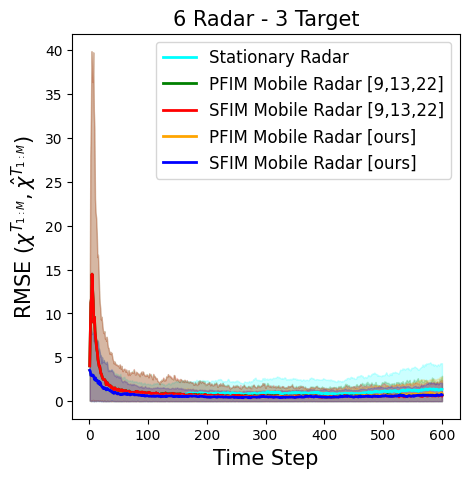

In [123]:
rmse_nomove_median = np.quantile(rmse_nomove,q=0.5,axis=0)
rmse_move_pfim_bad_median = np.quantile(rmse_move_pfim_bad,q=0.5,axis=0)
rmse_move_sfim_bad_median = np.quantile(rmse_move_sfim_bad,q=0.5,axis=0)
rmse_move_pfim_median = np.quantile(rmse_move_pfim,q=0.5,axis=0)
rmse_move_sfim_median = np.quantile(rmse_move_sfim,q=0.5,axis=0)

hdi_interval = 0.9

plt.figure(figsize=(5,5))
az.plot_hdi(k, np.expand_dims(rmse_nomove,axis=0),hdi_prob=hdi_interval,smooth=False,color='cyan',fill_kwargs={'alpha': 0.2})
plt.plot(k,rmse_nomove_median ,linewidth=2,color="cyan",label='Stationary Radar') #mean curve.

az.plot_hdi(k, np.expand_dims(rmse_move_pfim_bad,axis=0),hdi_prob=hdi_interval,smooth=False,color='green',fill_kwargs={'alpha': 0.2})
plt.plot(k,rmse_move_pfim_bad_median, linewidth=2,color="green",label='PFIM Mobile Radar [9,13,22]') #mean curve.

az.plot_hdi(k,np.expand_dims(rmse_move_sfim_bad,axis=0) ,hdi_prob=hdi_interval,smooth=False,color='red',fill_kwargs={'alpha': 0.2})
plt.plot(k,rmse_move_sfim_bad_median, linewidth=2,color="red",label='SFIM Mobile Radar [9,13,22]') #mean curve.

az.plot_hdi(k, np.expand_dims(rmse_move_pfim,axis=0),hdi_prob=hdi_interval,smooth=False,color='orange',fill_kwargs={'alpha': 0.2})
plt.plot(k,rmse_move_pfim_median, linewidth=2,color="orange",label='PFIM Mobile Radar [ours]') #mean curve.

az.plot_hdi(k, np.expand_dims(rmse_move_sfim,axis=0),hdi_prob=hdi_interval,smooth=False,color='blue',fill_kwargs={'alpha': 0.2})
plt.plot(k,rmse_move_sfim_median, linewidth=2,color="blue",label='SFIM Mobile Radar [ours]') #mean curve.

plt.xlabel("Time Step",fontsize=15)
plt.ylabel('RMSE $(\chi^{T_{1:M}},\\hat{\chi}^{T_{1:M}})$',fontsize=15)
# plt.ylabel("$x^2$")
plt.legend(loc="upper right",fontsize=12)
# plt.title("3 Radars - 4 Targets",fontsize=20)
plt.title(title,fontsize=15)

plt.savefig(os.path.join(folder_save,f"rmse_median_overlayed{experiment_number}.pdf"))

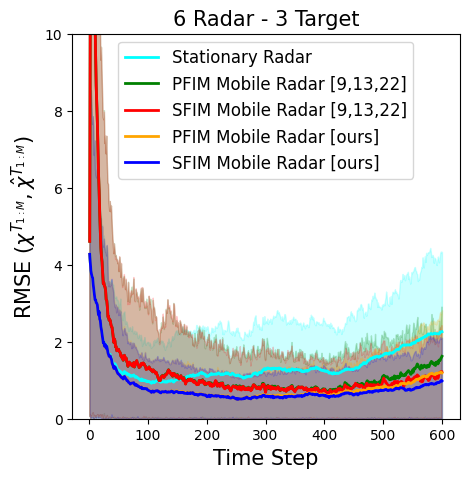

In [124]:
rmse_nomove_mean = np.mean(rmse_nomove,axis=0)
rmse_move_pfim_bad_mean = np.mean(rmse_move_pfim_bad,axis=0)
rmse_move_sfim_bad_mean = np.mean(rmse_move_sfim_bad,axis=0)
rmse_move_pfim_mean = np.mean(rmse_move_pfim,axis=0)
rmse_move_sfim_mean = np.mean(rmse_move_sfim,axis=0)

hdi_interval = 0.9

plt.figure(figsize=(5,5))
az.plot_hdi(k, np.expand_dims(rmse_nomove,axis=0),hdi_prob=hdi_interval,smooth=False,color='cyan',fill_kwargs={'alpha': 0.2})
plt.plot(k,rmse_nomove_mean ,linewidth=2,color="cyan",label='Stationary Radar') #mean curve.

az.plot_hdi(k, np.expand_dims(rmse_move_pfim_bad,axis=0),hdi_prob=hdi_interval,smooth=False,color='green',fill_kwargs={'alpha': 0.2})
plt.plot(k,rmse_move_pfim_bad_mean, linewidth=2,color="green",label='PFIM Mobile Radar [9,13,22]') #mean curve.

az.plot_hdi(k,np.expand_dims(rmse_move_sfim_bad,axis=0) ,hdi_prob=hdi_interval,smooth=False,color='red',fill_kwargs={'alpha': 0.2})
plt.plot(k,rmse_move_sfim_bad_mean, linewidth=2,color="red",label='SFIM Mobile Radar [9,13,22]') #mean curve.

az.plot_hdi(k, np.expand_dims(rmse_move_pfim,axis=0),hdi_prob=hdi_interval,smooth=False,color='orange',fill_kwargs={'alpha': 0.2})
plt.plot(k,rmse_move_pfim_mean, linewidth=2,color="orange",label='PFIM Mobile Radar [ours]') #mean curve.

az.plot_hdi(k, np.expand_dims(rmse_move_sfim,axis=0),hdi_prob=hdi_interval,smooth=False,color='blue',fill_kwargs={'alpha': 0.2})
plt.plot(k,rmse_move_sfim_mean, linewidth=2,color="blue",label='SFIM Mobile Radar [ours]') #mean curve.

plt.xlabel("Time Step",fontsize=15)
plt.ylabel('RMSE $(\chi^{T_{1:M}},\\hat{\chi}^{T_{1:M}})$',fontsize=15)
# plt.ylabel("$x^2$")
plt.legend(loc="upper center",fontsize=12)
# plt.title("3 Radars - 4 Targets",fontsize=20)
plt.ylim([0,10])
plt.title(title,fontsize=15)

plt.savefig(os.path.join(folder_save,f"rmse_mean_overlayed{experiment_number}.pdf"))

In [125]:
# plt.figure(figsize=(5,5))
# hdi_interval = 0.9
# az.plot_hdi(k, np.expand_dims(rmse_move_pfim_bad,axis=0),hdi_prob=hdi_interval,smooth=False,color='green',fill_kwargs={'alpha': 0.2})
# plt.plot(np.quantile(rmse_move_pfim_bad,q=0.5,axis=0), linewidth=2,color="green",label='PFIM Mobile Radar [9,13,22]') #mean curve.
# az.plot_hdi(k, np.expand_dims(rmse_move_sfim_bad,axis=0),hdi_prob=hdi_interval,smooth=False,color='red',fill_kwargs={'alpha': 0.2})
# plt.plot(np.quantile(rmse_move_sfim_bad,q=0.5,axis=0), linewidth=2,color="red",label='SFIM Mobile Radar [9,13,22]') #mean curve.
# az.plot_hdi(k, np.expand_dims(rmse_move_pfim,axis=0),hdi_prob=hdi_interval,smooth=False,color='orange',fill_kwargs={'alpha': 0.2})
# plt.plot(np.quantile(rmse_move_pfim,q=0.5,axis=0), linewidth=2,color="orange",label='PFIM Mobile Radar [ours]') #mean curve.
# az.plot_hdi(k, np.expand_dims(rmse_move_sfim,axis=0),hdi_prob=hdi_interval,smooth=False,color='blue',fill_kwargs={'alpha': 0.2})
# plt.plot(np.quantile(rmse_move_sfim,q=0.5,axis=0), linewidth=2,color="blue",label='SFIM Mobile Radar [ours]') #mean curve.

# plt.xlabel("Time Step",fontsize=15)
# plt.ylabel('RMSE $(\chi^{T_{1:M}},\\hat{\chi}^{T_{1:M}})$',fontsize=15)
# # plt.ylabel("$x^2$")
# plt.legend(loc="upper right",fontsize=12)
# plt.title(title,fontsize=15)
# plt.savefig(os.path.join("results",f"rmse_overlayed_sfimbad{experiment_number}.pdf")) # 

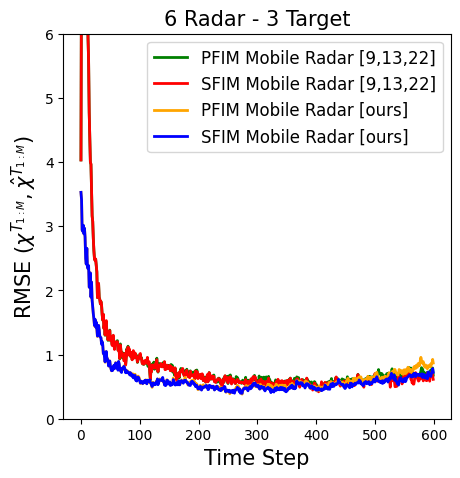

In [126]:
plt.figure(figsize=(5,5))
plt.plot(rmse_move_pfim_bad_median, linewidth=2,color="green",label='PFIM Mobile Radar [9,13,22]') #mean curve.

plt.plot(rmse_move_sfim_bad_median, linewidth=2,color="red",label='SFIM Mobile Radar [9,13,22]') #mean curve.

plt.plot(rmse_move_pfim_median, linewidth=2,color="orange",label='PFIM Mobile Radar [ours]') #mean curve.

plt.plot(rmse_move_sfim_median, linewidth=2,color="blue",label='SFIM Mobile Radar [ours]') #mean curve.

plt.xlabel("Time Step",fontsize=15)
plt.ylabel('RMSE $(\chi^{T_{1:M}},\\hat{\chi}^{T_{1:M}})$',fontsize=15)
# plt.ylabel("$x^2$")
plt.legend(loc="upper right",fontsize=12)
plt.title(title,fontsize=15)
plt.ylim([0,6])
plt.savefig(os.path.join(folder_save,f"rmse_med_nohdi{experiment_number}.pdf"))

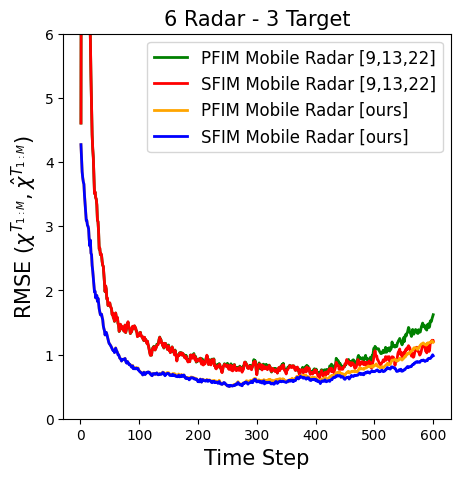

In [127]:
plt.figure(figsize=(5,5))
plt.plot(k,rmse_move_pfim_bad_mean, linewidth=2,color="green",label='PFIM Mobile Radar [9,13,22]') #mean curve.

plt.plot(k,rmse_move_sfim_bad_mean, linewidth=2,color="red",label='SFIM Mobile Radar [9,13,22]') #mean curve.

plt.plot(k,rmse_move_pfim_mean, linewidth=2,color="orange",label='PFIM Mobile Radar [ours]') #mean curve.

plt.plot(k,rmse_move_sfim_mean, linewidth=2,color="blue",label='SFIM Mobile Radar [ours]') #mean curve.

plt.xlabel("Time Step",fontsize=15)
plt.ylabel('RMSE $(\chi^{T_{1:M}},\\hat{\chi}^{T_{1:M}})$',fontsize=15)
# plt.ylabel("$x^2$")
plt.legend(loc="upper right",fontsize=12)
plt.title(title,fontsize=15)
plt.ylim([0,6])
plt.savefig(os.path.join(folder_save,f"rmse_mean_nohdi{experiment_number}.pdf"))

In [128]:
print("SFIM med: ",np.median(rmse_move_sfim))
print("PFIM med: ",np.median(rmse_move_pfim))
print("SFIM bad med: ",np.median(rmse_move_sfim_bad))
print("PFIM bad med: ",np.median(rmse_move_pfim_bad))
print("No move: ",np.median(rmse_nomove))

SFIM med:  0.5757701186843653
PFIM med:  0.6074178997188827
SFIM bad med:  0.6930875281917384
PFIM bad med:  0.7161523286220319
No move:  0.9696731344559508


In [129]:
print("SFIM hdi upper: ",np.mean(rmse_move_sfim))
print("PFIM hdi upper: ",np.mean(rmse_move_pfim))
print("SFIM bad hdi upper: ",np.mean(rmse_move_sfim_bad))
print("PFIM bad hdi upper: ",np.mean(rmse_move_pfim_bad))
print("No move: ",np.mean(rmse_nomove))

SFIM hdi upper:  0.8145499834287229
PFIM hdi upper:  0.8603825054157148
SFIM bad hdi upper:  1.3443776264189806
PFIM bad hdi upper:  1.3978252047345374
No move:  1.4166912625423287


In [130]:
hdi_interval = 0.90
print("SFIM hdi upper: ",az.hdi(rmse_move_sfim.ravel(),hdi_prob=hdi_interval)[1])
print("PFIM hdi upper: ",az.hdi(rmse_move_pfim.ravel(),hdi_prob=hdi_interval)[1])
print("SFIM hdi upper: ",az.hdi(rmse_move_sfim_bad.ravel(),hdi_prob=hdi_interval)[1])
print("PFIM hdi upper: ",az.hdi(rmse_move_pfim_bad.ravel(),hdi_prob=hdi_interval)[1])
print("No move: ",az.hdi(rmse_nomove.ravel(),hdi_prob=0.8)[1])

SFIM hdi upper:  1.6351467404687545
PFIM hdi upper:  1.7484119564939018
SFIM hdi upper:  2.5452247498644978
PFIM hdi upper:  2.630591678521096
No move:  2.0113690161467486


## Plot ECDF

In [131]:
from statsmodels.distributions.empirical_distribution import ECDF

In [132]:
pfim_bad_ecdf = ECDF(rmse_move_pfim_bad.ravel())
sfim_bad_ecdf = ECDF(rmse_move_sfim_bad.ravel())
pfim_ecdf = ECDF(rmse_move_pfim.ravel())
sfim_ecdf = ECDF(rmse_move_sfim.ravel())
nomove_ecdf = ECDF(rmse_nomove.ravel())

In [133]:
error = np.linspace(0,8,2000)

In [134]:
pfim_bad_ecdf_val = pfim_bad_ecdf(error)
sfim_bad_ecdf_val = sfim_bad_ecdf(error)
pfim_ecdf_val = pfim_ecdf(error)
sfim_ecdf_val = sfim_ecdf(error)
nomove_ecdf_val = nomove_ecdf(error)

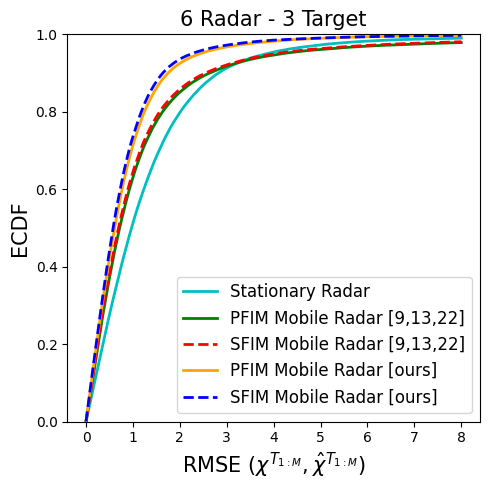

In [135]:
plt.figure(figsize=(5,5))
plt.plot(error,nomove_ecdf_val,"c-",linewidth=2,label="Stationary Radar")
plt.plot(error,pfim_bad_ecdf_val,"g-",linewidth=2,label="PFIM Mobile Radar [9,13,22]")
plt.plot(error,sfim_bad_ecdf_val,"r--",linewidth=2,label="SFIM Mobile Radar [9,13,22]")
plt.plot(error,pfim_ecdf_val,color="orange",linewidth=2,linestyle="-",label="PFIM Mobile Radar [ours]")
plt.plot(error,sfim_ecdf_val,'b--',linewidth=2,label="SFIM Mobile Radar [ours]")
plt.xlabel('RMSE $(\chi^{T_{1:M}},\\hat{\chi}^{T_{1:M}})$',fontsize=15)
plt.ylabel("ECDF",fontsize=15)
plt.title(title,fontsize=15)
plt.legend(fontsize=12)
plt.ylim([0,1])
plt.tight_layout()
plt.savefig(os.path.join(folder_save,f"ecdf{experiment_number}.pdf")) # 

## Analyze control frequency

In [32]:
# experiment_name = os.path.join(f"Experiment4_SFIM",f"N_radar={N_radar}-{move_radars[1]}")
# results_savepath = "results"
# filepath = os.path.join(results_savepath,experiment_name)

# hz_array = get_hz_array(filepath)

# experiment_name = os.path.join(f"Experiment4_SFIM",f"N_radar={N_radar}-{move_radars[1]}")
# results_savepath = "results"
# filepath = os.path.join(results_savepath,experiment_name)

# k,rmse_move_sfim_fast = get_rmse_array(filepath)
# print(len(rmse_move_sfim_fast))

# plt.figure()
# hz_array
# az.plot_density(data = hz_array.mean(axis=1),colors="b")
# plt.show()

# plt.figure(figsize=(5,5))
# az.plot_hdi(k, np.expand_dims(rmse_move_sfim_fast,axis=0),hdi_prob=0.8,smooth=False,color='red',fill_kwargs={'alpha': 0.2})
# plt.plot(np.quantile(rmse_move_sfim_fast,q=0.5,axis=0), linewidth=2,color="red",label='SFIM Mobile Radar 26 Hz') #mean curve.
# az.plot_hdi(k, np.expand_dims(rmse_move_sfim,axis=0),hdi_prob=0.8,smooth=False,color='blue',fill_kwargs={'alpha': 0.2})
# plt.plot(np.quantile(rmse_move_sfim,q=0.5,axis=0), linewidth=2,color="blue",label='SFIM Mobile Radar 10-15 Hz') #mean curve.
# plt.xlabel("Time Step",fontsize=15)
# plt.ylabel('RMSE $(\chi^{T_{1:M}},\\hat{\chi}^{T_{1:M}})$',fontsize=15)
# # plt.ylabel("$x^2$")
# plt.legend(loc="upper right",fontsize=12)
# # plt.title("3 Radars - 4 Targets",fontsize=20)
# plt.title(title,fontsize=15)

# plt.savefig(os.path.join("results",f"rmse_fast{experiment_number}_compare.pdf"))

## Plot Overlapped Results

In [33]:
def get_rmse_array_single(filepath):
    results_mv_radar = sorted(list(glob.iglob(filepath+"*/*rmse*")))

    # print(results_mv_radar)

    rmse_array = []
    for rmse_file in results_mv_radar:
        rmse_array_i = np.genfromtxt(rmse_file,delimiter=",",skip_header=1)
        rmse_array.append(rmse_array_i[:1000])

    rmse_array = np.stack(rmse_array)

    k = rmse_array[:,:1000,0].mean(axis=0)
    rmse = rmse_array[:,:1000,1]


    rmse = np.sqrt((rmse**2) / (N_radar*6))

    
    return k,rmse

In [34]:
folder_path = r"/home/mlpotter/Documents/Northeastern/Research/OptimalTrackingAndControl/src_faster"
experiment_name = "test_SFIMbad_e1_123"
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_sfimbad = get_rmse_array_single(filepath)
print(len(rmse_sfimbad))

1


In [35]:
folder_path = r"/home/mlpotter/Documents/Northeastern/Research/OptimalTrackingAndControl/src_faster"
experiment_name = "test_SFIM_e1_123"
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_sfim = get_rmse_array_single(filepath)
print(len(rmse_sfim))

1


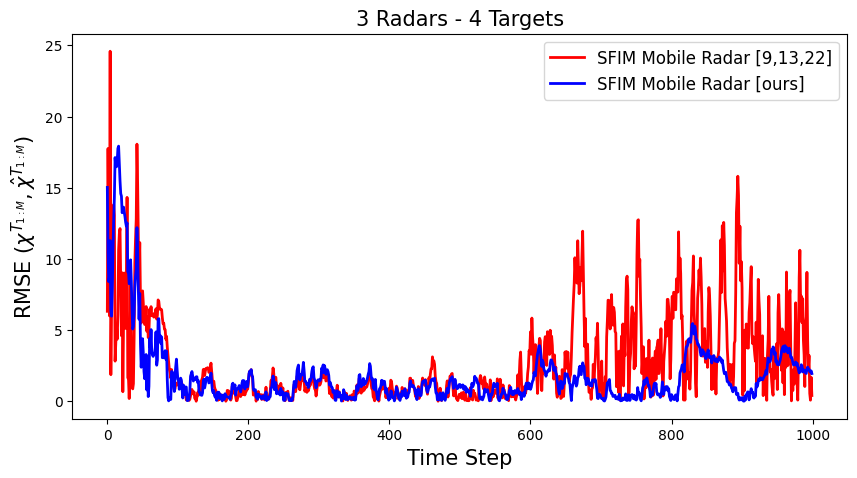

In [36]:
plt.figure(figsize=(10,5))

plt.plot(rmse_sfimbad.ravel(), linewidth=2,color="red",label='SFIM Mobile Radar [9,13,22]') #mean curve.
plt.plot(rmse_sfim.ravel(), linewidth=2,color="blue",label='SFIM Mobile Radar [ours]') #mean curve.

plt.xlabel("Time Step",fontsize=15)
plt.ylabel('RMSE $(\chi^{T_{1:M}},\hat{\chi}^{T_{1:M}})$',fontsize=15)
# plt.ylabel("$x^2$")
plt.legend(loc="upper right",fontsize=12)
plt.title("3 Radars - 4 Targets",fontsize=15)
plt.savefig(os.path.join("results","rmse_mse_realization1.pdf"))

In [37]:
folder_path = r"/home/mlpotter/Documents/Northeastern/Research/OptimalTrackingAndControl/src_faster"
experiment_name = "test_SFIMbad_e2_123"
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_sfimbad = get_rmse_array_single(filepath)
print(len(rmse_sfimbad))

1


In [38]:
folder_path = r"/home/mlpotter/Documents/Northeastern/Research/OptimalTrackingAndControl/src_faster"
experiment_name = "test_SFIM_e2_123"
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_sfim = get_rmse_array_single(filepath)
print(len(rmse_sfim))

1


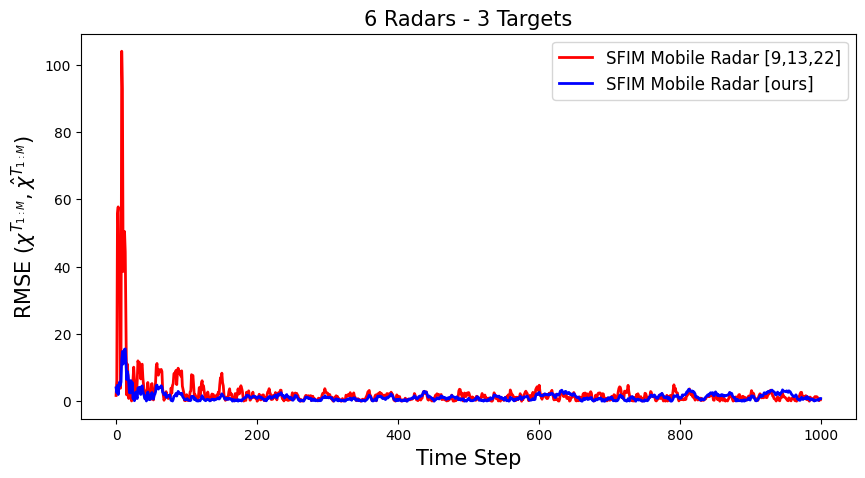

In [39]:
plt.figure(figsize=(10,5))

plt.plot(rmse_sfimbad.ravel(), linewidth=2,color="red",label='SFIM Mobile Radar [9,13,22]') #mean curve.
plt.plot(rmse_sfim.ravel(), linewidth=2,color="blue",label='SFIM Mobile Radar [ours]') #mean curve.

plt.xlabel("Time Step",fontsize=15)
plt.ylabel('RMSE $(\chi^{T_{1:M}},\hat{\chi}^{T_{1:M}})$',fontsize=15)
# plt.ylabel("$x^2$")
plt.legend(loc="upper right",fontsize=12)
plt.title("6 Radars - 3 Targets",fontsize=15)
plt.savefig(os.path.join("results","rmse_mse_realization2.pdf"))